In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# Any results you write to the current directory are saved as output.

['WorldCups.csv', 'WorldCupMatches.csv', 'WorldCupPlayers.csv']


In [54]:
cup_df = pd.read_csv("../input/WorldCups.csv")
cup_df.head(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [55]:
cup_df["Attendance"] = cup_df['Attendance'].str.replace('.','').astype(int)
cup_df = cup_df.replace('Germany FR','Germany')

In [56]:
len(cup_df)

20

In [57]:
winner_count_df = cup_df['Winner'].value_counts().reset_index()

In [58]:
winner_count_df

,index,Winner
0,Brazil,5
1,Italy,4
2,Germany,4
3,Argentina,2
4,Uruguay,2
5,England,1
6,France,1
7,Spain,1


In [59]:
winner_count_df.columns = ['Country', 'Wins']
winner_count_df


,Country,Wins
0,Brazil,5
1,Italy,4
2,Germany,4
3,Argentina,2
4,Uruguay,2
5,England,1
6,France,1
7,Spain,1


Text(0.5,0,'Countries')

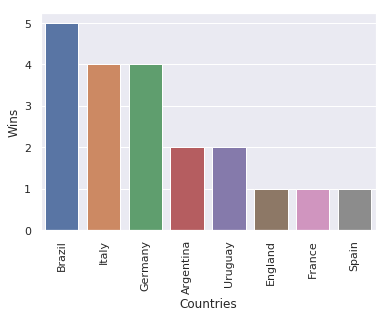

In [60]:
sns.barplot(winner_count_df["Country"],winner_count_df["Wins"])
plt.xticks(rotation=90)
plt.xlabel("Countries")

Text(0.5,0,'Year')

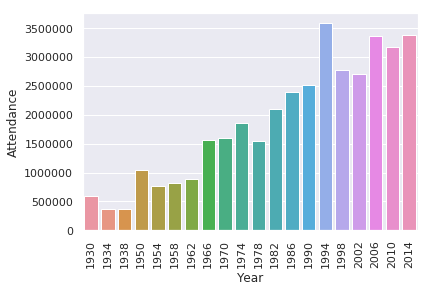

In [61]:
sns.barplot(cup_df["Year"], cup_df["Attendance"])
plt.xticks(rotation=90)
plt.xlabel("Year")

Text(0,0.5,'Goals Scored')

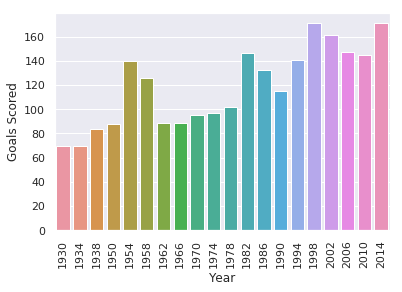

In [62]:
sns.barplot(cup_df["Year"], cup_df["GoalsScored"])
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Goals Scored")

In [63]:
second_count_df = cup_df['Runners-Up'].value_counts().reset_index()
second_count_df.columns = ['Country', 'Second']
second_count_df

,Country,Second
0,Germany,4
1,Netherlands,3
2,Argentina,3
3,Hungary,2
4,Brazil,2
5,Czechoslovakia,2
6,Italy,2
7,Sweden,1
8,France,1


In [64]:
third_count_df = cup_df['Third'].value_counts().reset_index()
third_count_df.columns = ['Country', 'Third']
third_count_df

,Country,Third
0,Germany,4
1,Brazil,2
2,Poland,2
3,Sweden,2
4,France,2
5,Italy,1
6,Netherlands,1
7,Portugal,1
8,Chile,1
9,Croatia,1


In [65]:
fourth_count_df = cup_df['Fourth'].value_counts().reset_index()
fourth_count_df.columns = ['Country', 'Fourth']
fourth_count_df

,Country,Fourth
0,Uruguay,3
1,Yugoslavia,2
2,Brazil,2
3,Soviet Union,1
4,Sweden,1
5,Netherlands,1
6,Portugal,1
7,England,1
8,Germany,1
9,Spain,1


In [66]:
merge_df1 = pd.merge(winner_count_df, second_count_df, how='outer', on=['Country'])
merge_df2 = pd.merge(merge_df1, third_count_df, how='outer', on=['Country'])
win_count_df = pd.merge(merge_df2, fourth_count_df, how='outer', on=['Country'])
win_count_df

,Country,Wins,Second,Third,Fourth
0,Brazil,5.0,2.0,2.0,2.0
1,Italy,4.0,2.0,1.0,1.0
2,Germany,4.0,4.0,4.0,1.0
3,Argentina,2.0,3.0,NaN,NaN
4,Uruguay,2.0,NaN,NaN,3.0
5,England,1.0,NaN,NaN,1.0
6,France,1.0,1.0,2.0,1.0
7,Spain,1.0,NaN,NaN,1.0
8,Netherlands,NaN,3.0,1.0,1.0
9,Hungary,NaN,2.0,NaN,NaN


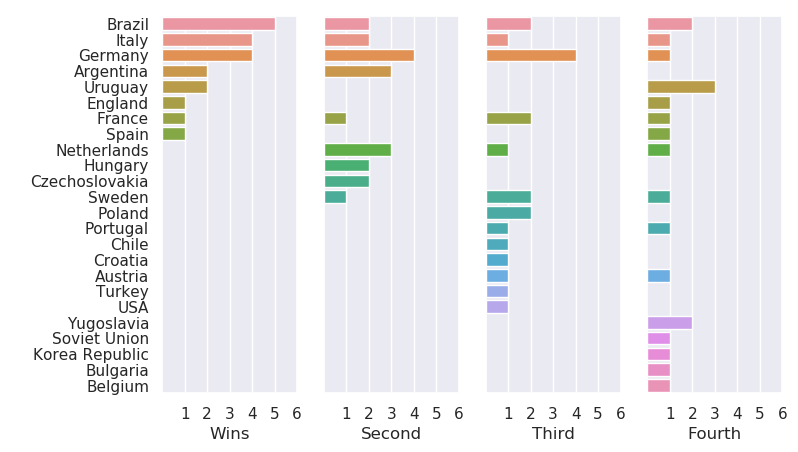

In [67]:
fig, ax = plt.subplots(1,4, figsize=(8,5), sharey=True, dpi=100)
sns.barplot(win_count_df["Wins"], win_count_df["Country"], ax=ax[0])
sns.barplot(win_count_df["Second"], win_count_df["Country"], ax=ax[1])
sns.barplot(win_count_df["Third"], win_count_df["Country"], ax=ax[2])
sns.barplot(win_count_df["Fourth"], win_count_df["Country"], ax=ax[3])
for i in range(4):
    ax[i].set_ylabel(" ")
    ax[i].set_xticks([1, 2, 3, 4, 5, 6])
